In [4]:
from glob import glob
from os.path import join


video_root = "/data/agent_h/datasets_chunyu/clip_videos_v3/"
video_paths = sorted(glob(join(video_root,"**/*.mp4"),recursive=True))
whisper_root = "/data/agent_h/datasets_chunyu/whisper_result_v3/"
whisper_paths = sorted(glob(join(whisper_root,"*")))
mediapipe_root = "/data/agent_h/datasets_chunyu/vsr_landmark_result_v3/"
mediapipe_paths = sorted(glob(join(mediapipe_root,"*")))

# 1. form whiper and face into frames

print(video_paths[0])
print(whisper_paths[0])
print(mediapipe_paths[0])


/data/agent_h/datasets_chunyu/clip_videos_v3/2016-07-10/2016-07-10_0.mp4
/data/agent_h/datasets_chunyu/whisper_result_v3/2016-07-10_0_whisper.json
/data/agent_h/datasets_chunyu/vsr_landmark_result_v3/2016-07-10_0.FaceLandmarkerResultListzip


In [ ]:
# clean whisper
from pprint import pprint
import json
from datagen_ops import *
import gzip
import pickle
import numpy as np
import mediapipe as mp
from mediapipe_util import *
import cv2
from os.path import basename
import os
import uuid
from tqdm import tqdm

text_save_batch = []
face_save_batch = []
save_batch_counter = 0
total_batch_counter = 0

for video_idx in tqdm(range(len(video_paths))):
    whisper_json_path = whisper_paths[video_idx]
    with open(whisper_json_path, 'r') as fp:
        whisper_result = json.load(fp)


    save_path = "/data/agent_h/face_text_windows_v3/"
    os.makedirs(save_path, exist_ok=True)

    text_windows = get_whisper_text_windows(whisper_result, clip_len=15, window_len=3)
    # pprint(text_windows)

        
    face_windows = get_mediapipe_windows(mediapipe_paths[video_idx], clip_len=15, window_len=3)
    # numpy_window_normalized = normalize_face_window(numpy_window[3:,:,:])
    for key,text in text_windows.items():
        if key not in face_windows:
            continue
        numpy_window = numpyify_face_windows(face_windows[key],sequence_len=15*25)
        base_name = basename(whisper_json_path)[:-12]+"{}_{}".format(key.split("/")[0],key.split("/")[1])
        text_save_batch.append({'id':base_name, 'text':text})
        face_save_batch.append(numpy_window)
        # print(base_name)
        save_batch_counter += 1
        if save_batch_counter % 100 == 0:

            save_id = uuid.uuid4()
            with open(join(save_path,"{}.json".format(save_id)), 'w') as fp:
                json.dump(text_save_batch, fp, sort_keys=True, indent=4, ensure_ascii=False)
            np.savez_compressed(join(save_path,"{}.npz".format(save_id)),np.array(face_save_batch,dtype=np.float32))
            text_save_batch = []
            face_save_batch = []
            total_batch_counter += 1
    
    
    





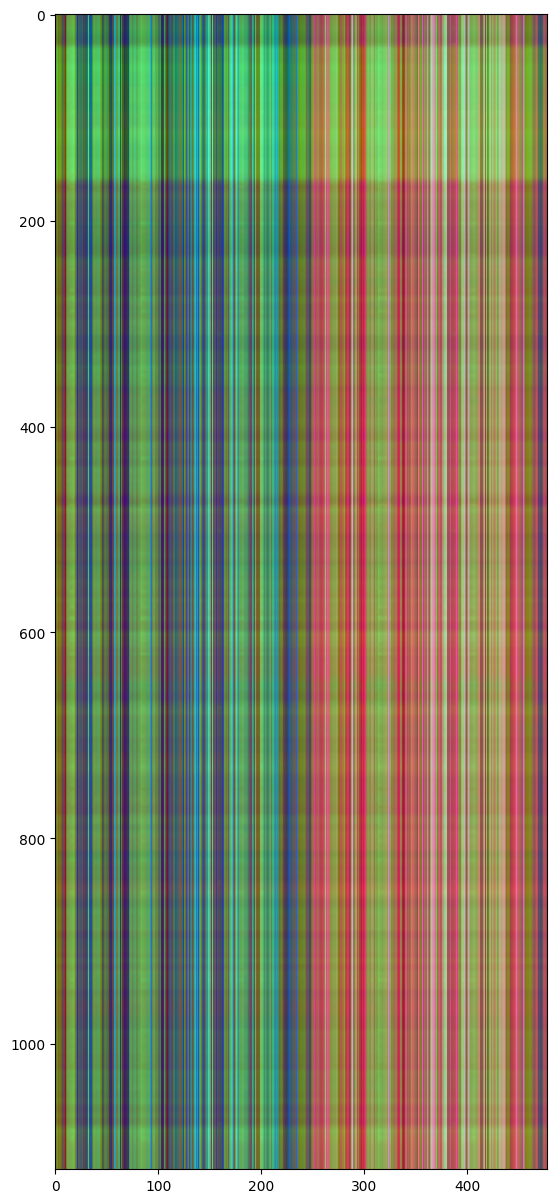

In [7]:
# clean mediapipe result
# variable length
# random drop faces
# other augments
# numpy_window = numpyify_face_windows(face_windows['03/18'])
# show_img_np(numpy_window_normalized*2-1,10)

## TODO straight
    # make face face front
    # visualize
    # save front face landmarks
    # save front face points
    # use facial_transformation_matrixes 
## TODO remove outliers, or normalize every frame
# normalize x,y,z

In [106]:
print(face_windows.keys())
for key,landmarks in face_windows.items():
    print(key,len(landmarks),len(landmarks[0]))
    
    break

dict_keys(['00/15', '03/18', '06/21', '09/24', '12/27', '15/30', '18/33', '21/36', '24/39', '27/42', '30/45', '33/48', '36/51', '39/54', '42/57', '45/60'])
00/15 375 478


In [55]:
# media
from moviepy.editor import VideoFileClip


def get_sound_clip_windows(video_path, clip_len = 15, window_len=3): # debug
    # get sound from video
    start_time = 0
    end_time = 15
    video = VideoFileClip(video_path)
    audio = video.audio
    # clip start to end
    audioclip = audio.subclip(start_time, end_time)
    audioclip.write_audiofile("output.wav")
    audio.close()
    video.close()
    


get_sound_clip_windows(video_paths[0])
    

def get_mouth_windows_fron_clip(): # use later
    pass

MoviePy - Writing audio in output.wav


MoviePy - Done.


In [49]:
!pip install moviepy -i https://mirrors.aliyun.com/pypi/simple/

Looking in indexes: https://mirrors.aliyun.com/pypi/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 388.3/388.3 kB 632.2 kB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.5/313.5 kB 708.8 kB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.9/26.9 MB 614.2 kB/s eta 0:00:0000:0100:02
  Created wheel for moviepy: filename=moviepy-1.0.3-py3-none-any.whl size=110721 sha256=ff05a71bf6abde63fc125faedea6fb825d8b30042d0647e9dcbaa0bf17db5fc2
  Stored in directory: /home/agent_h/.cache/pip/wheels/fd/96/fd/5fd2de5dc3cb46f352a8bde626e6fceb06dcdc3a8883175422
Successfully built moviepy
  Attempting uninstall: decorator
    Found existing installation: decorator 5.1.1
    Uninstalling decorator-5.1.1:
      Successfully uninstalled decorator-5.1.1
